Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Under this dataset we are going to predict the filght price on the basis of 11 instances:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [361]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

Loading data set

In [362]:
df=pd.read_csv("Flight_ticket_train.csv")

In [363]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [364]:
df.keys

<bound method NDFrame.keys of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR ? DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU ? IXR ? BBI ? BLR    05:50         13:15   7h 25m     2 stops   
2      DEL ? LKO ? BO

In [365]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [367]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The type of dataset is object

In [368]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is one null value in raute and one in total stops. I am replacing these null values with NaN values

In [369]:
df["Route"].fillna("NaN", inplace= True)
df["Total_Stops"].fillna("NaN", inplace= True)

In [370]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


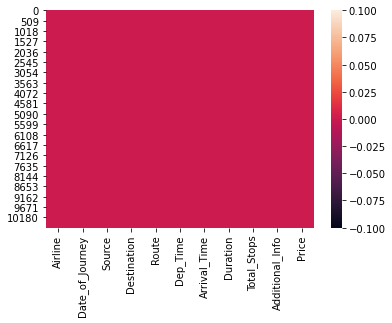

In [371]:
sns.heatmap(df.isnull())

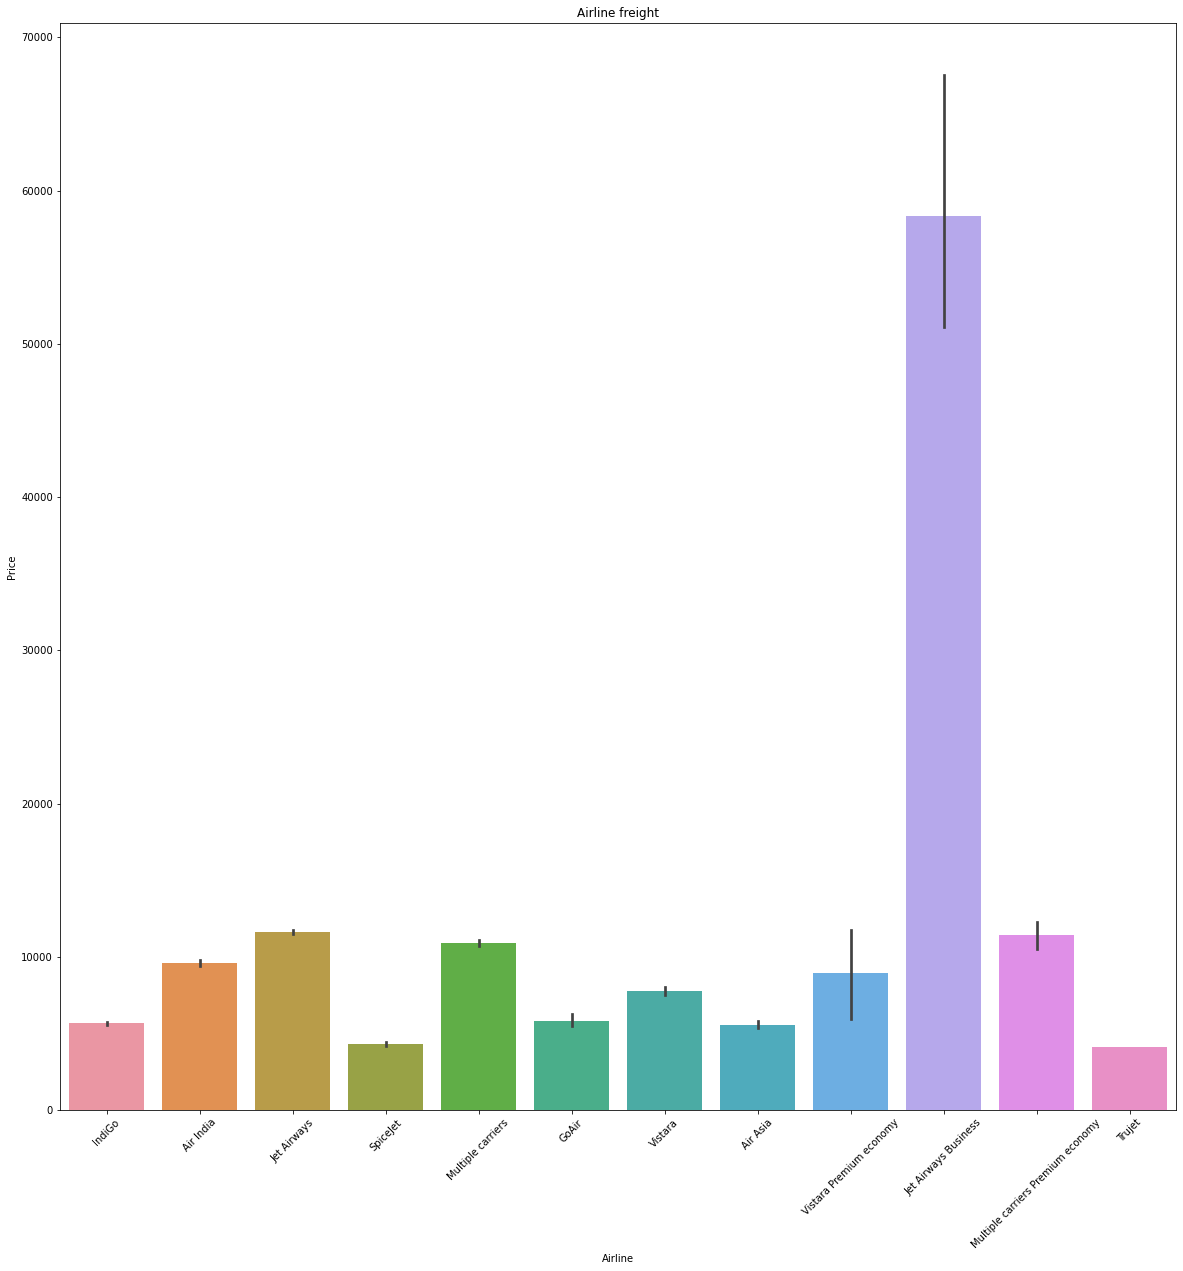

In [372]:
plt.figure(figsize=(20,20))
sns.barplot(x='Airline',y='Price',data=df)
plt.title("Airline freight")
plt.xticks(rotation=45)
plt.show()

The graphs shows that the Jet Airways Business has the heighest Price among all Airlines

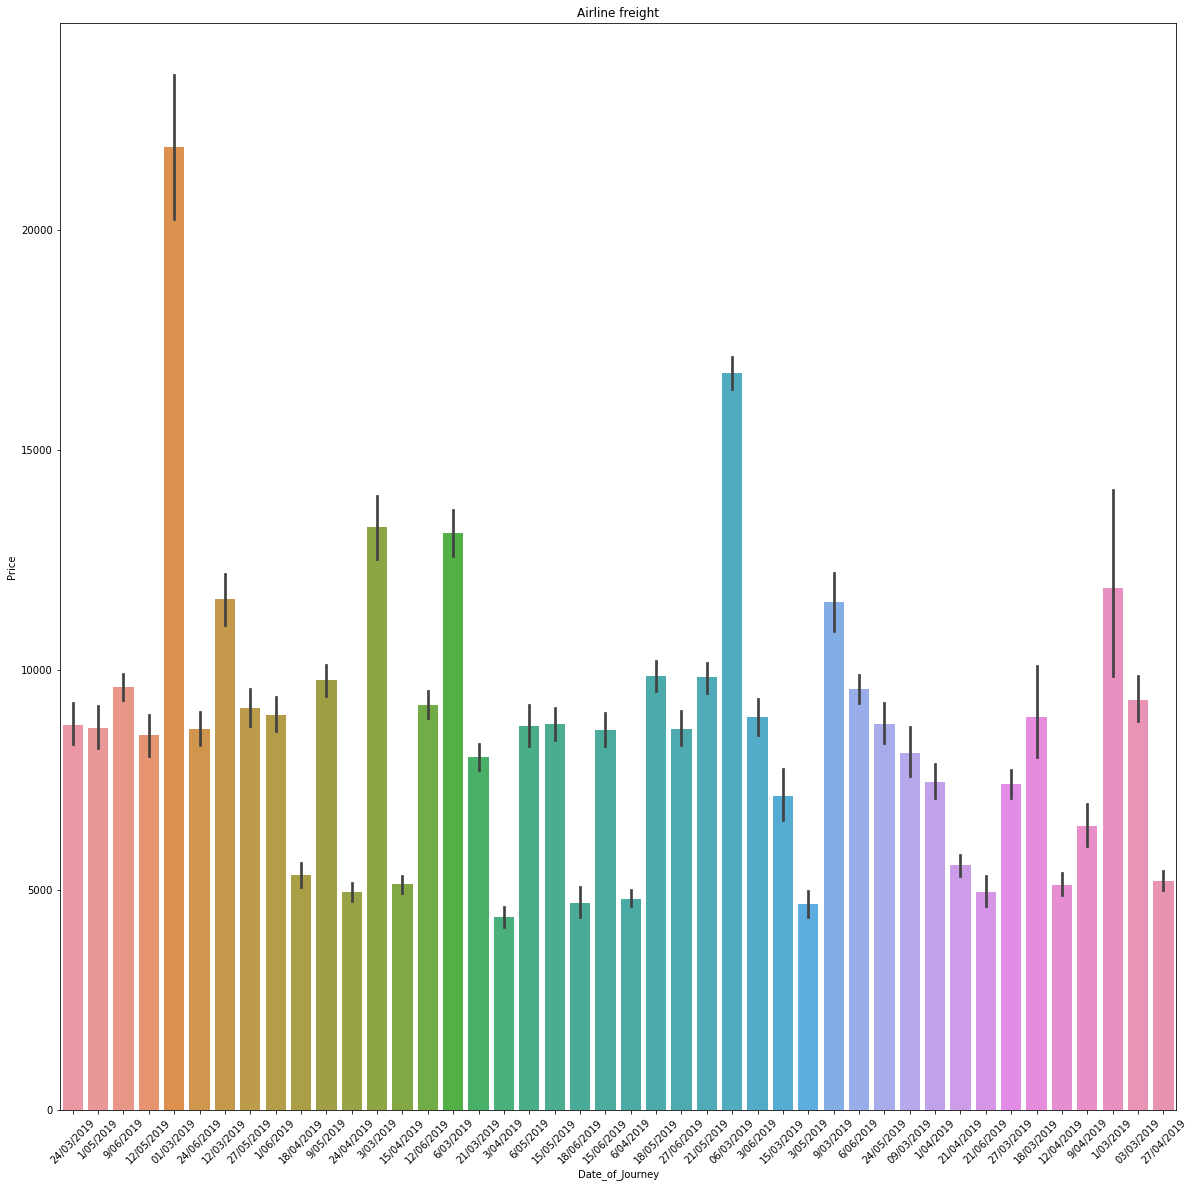

In [373]:
plt.figure(figsize=(20,20))
sns.barplot(x='Date_of_Journey',y='Price',data=df)
plt.title("Airline freight")
plt.xticks(rotation=45)
plt.show()

The price of airlines were on dated 01/03/2019 and the lowest price was on 30/04/2019

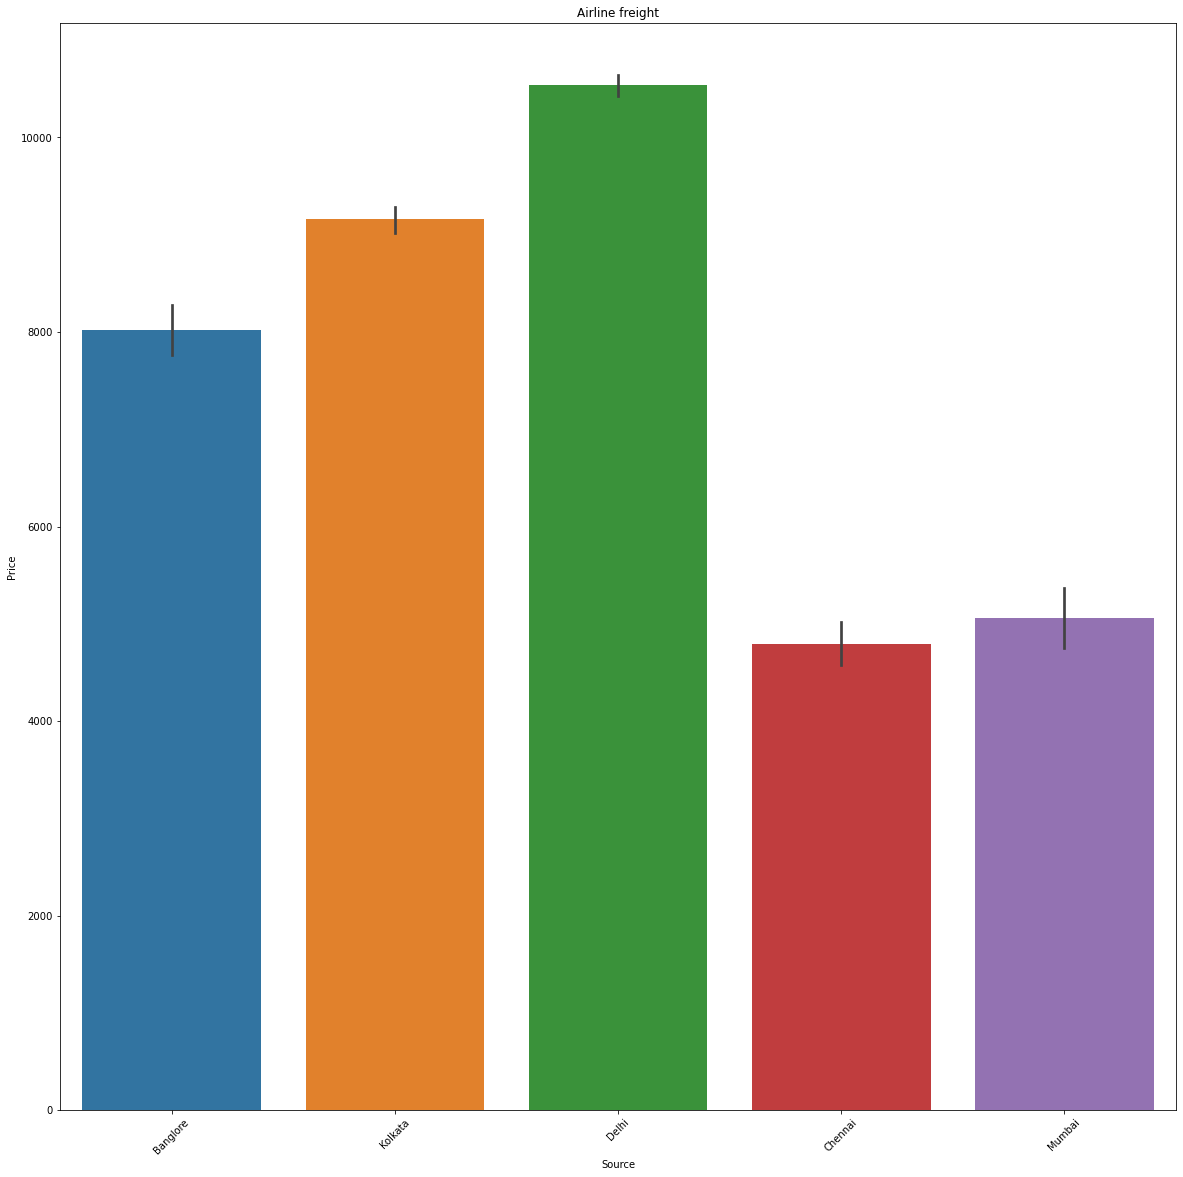

In [374]:
plt.figure(figsize=(20,20))
sns.barplot(x='Source',y='Price',data=df)
plt.title("Airline freight")
plt.xticks(rotation=45)
plt.show()

The hieghest price was for Delhi than Kolkatta,Banglore,Mumbai and than Chennai

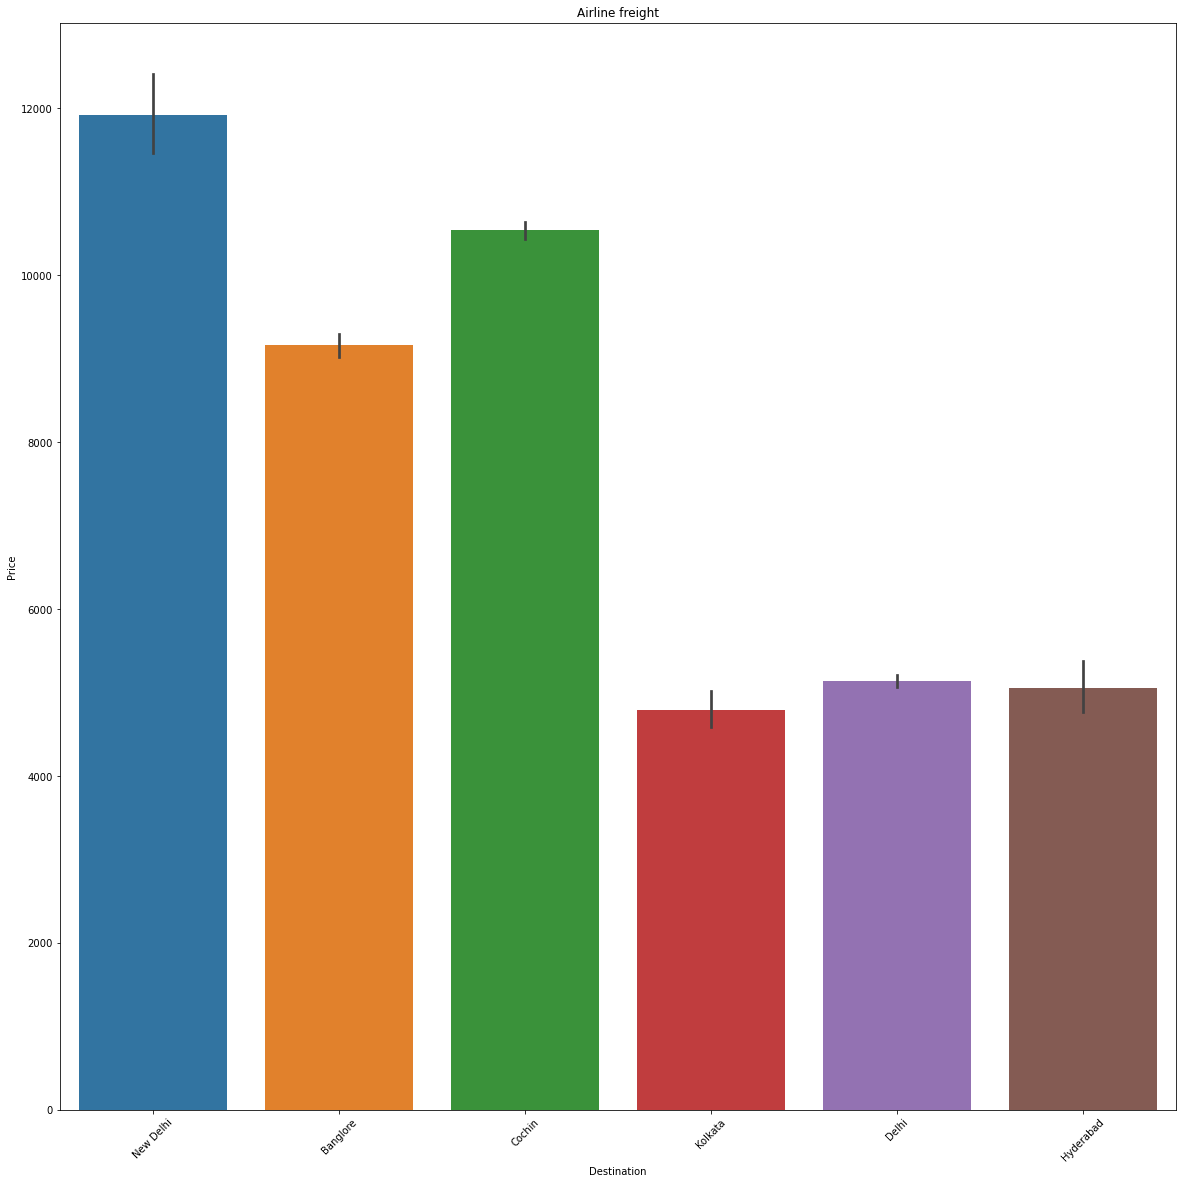

In [375]:
plt.figure(figsize=(20,20))
sns.barplot(x='Destination',y='Price',data=df)
plt.title("Airline freight")
plt.xticks(rotation=45)
plt.show()

The heighest destinated price is for New Delhi than Cochin,Banglore,Delhi,Hyderabad and the last one is for Kolkatta

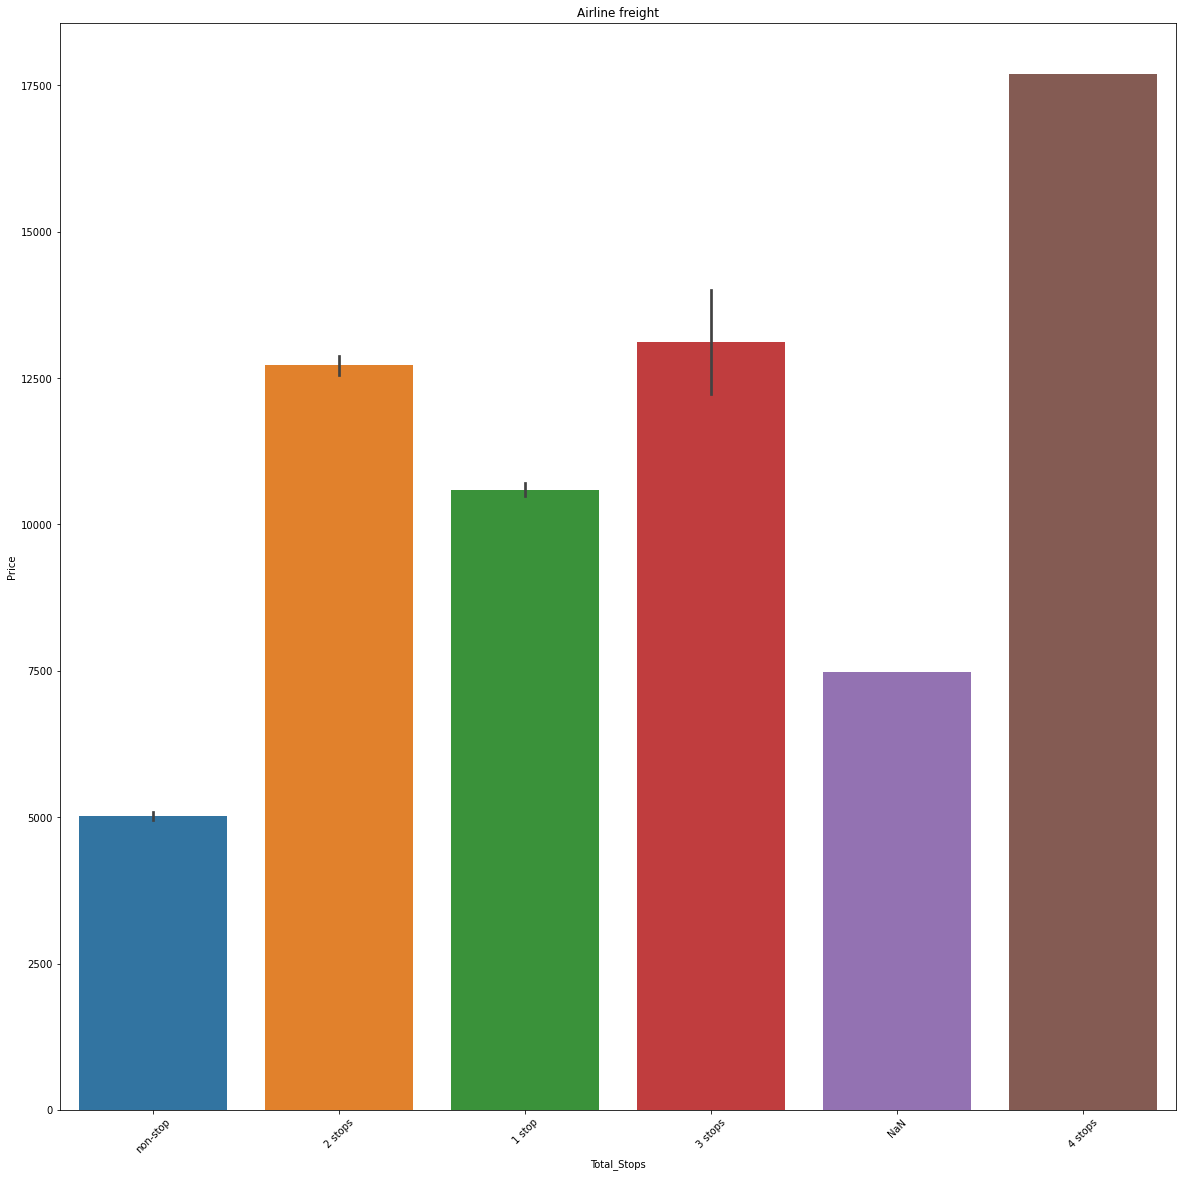

In [376]:
plt.figure(figsize=(20,20))
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.title("Airline freight")
plt.xticks(rotation=45)
plt.show()

The graphs shows that the heighest price charged for 4stops

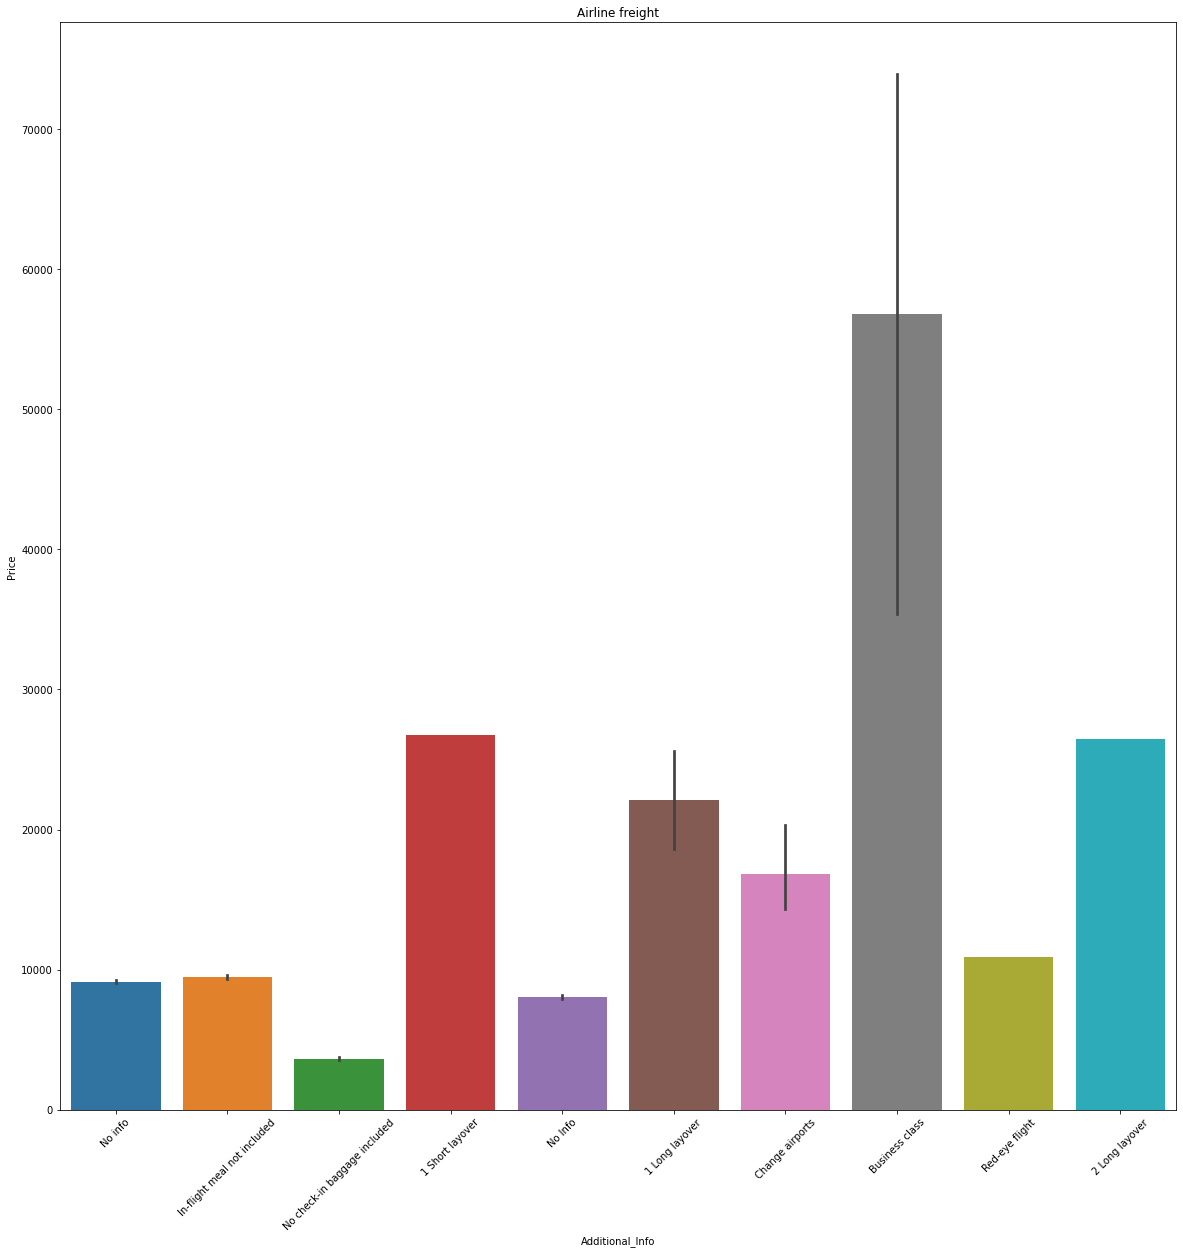

In [377]:
plt.figure(figsize=(20,20))
sns.barplot(x='Additional_Info',y='Price',data=df)
plt.title("Airline freight")
plt.xticks(rotation=45)
plt.show()

The hieghest price is for business class and the lowest one is for No check in baggage included

In [378]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()

df["Airline"]=LE.fit_transform(df["Airline"])
df["Date_of_Journey"]=LE.fit_transform(df["Date_of_Journey"])
df["Source"]=LE.fit_transform(df["Source"])
df["Destination"]=LE.fit_transform(df["Destination"])
df["Route"]=LE.fit_transform(df["Route"])
df["Dep_Time"]=LE.fit_transform(df["Dep_Time"])
df["Arrival_Time"]=LE.fit_transform(df["Arrival_Time"])
df["Duration"]=LE.fit_transform(df["Duration"])
df["Total_Stops"]=LE.fit_transform(df["Total_Stops"])
df["Additional_Info"]=LE.fit_transform(df["Additional_Info"])

In [379]:
dfcor=df.corr() #Checking correlation
dfcor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025039,-0.039439,-0.015733,0.027917,0.046130,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275233,-0.007836,-0.012507,-0.001168,-0.045486,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403378,0.055191,0.020844,-0.192009,-0.227074,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461169,-0.063608,-0.036830,0.022037,0.340446,0.026806,-0.071112
Route,0.025039,0.275233,0.403378,-0.461169,1.000000,-0.082080,0.010523,-0.062111,-0.445250,0.035216,0.164085
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082080,1.000000,-0.023294,0.041619,0.046574,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010523,-0.023294,1.000000,0.027746,-0.095612,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062111,0.041619,0.027746,1.000000,0.177752,0.080151,-0.144270
Total_Stops,0.046130,-0.045486,-0.227074,0.340446,-0.445250,0.046574,-0.095612,0.177752,1.000000,0.161728,-0.581863
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035216,-0.052853,0.017505,0.080151,0.161728,1.000000,-0.065478


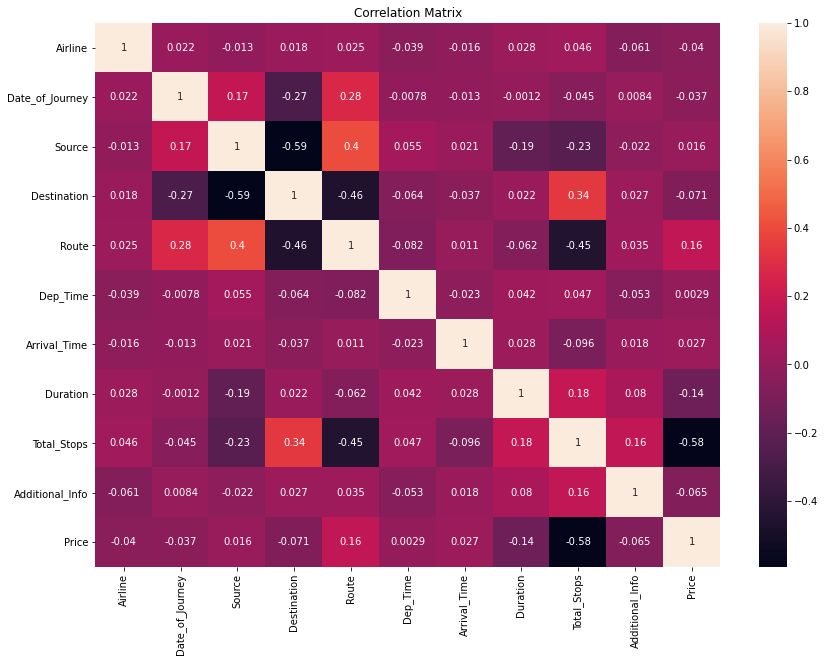

In [380]:
plt.figure(figsize=(14,10))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

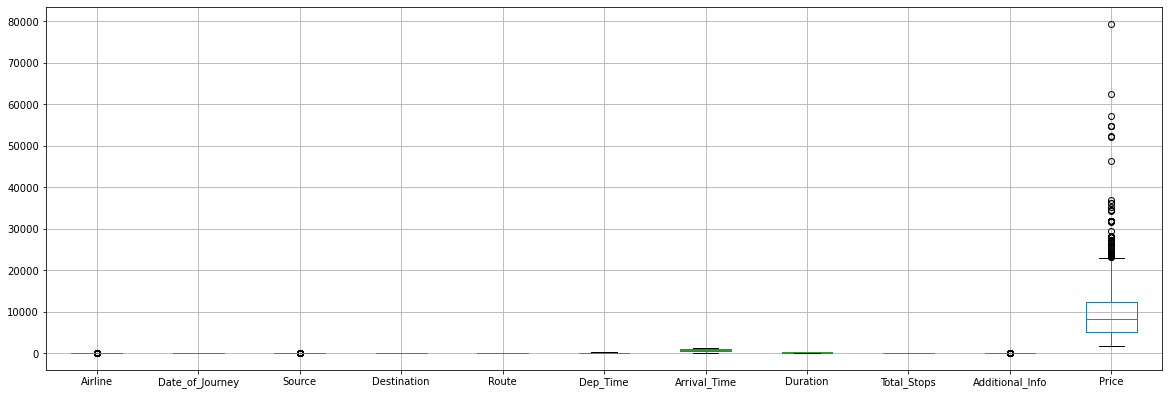

In [381]:
#Plotting boxplots to check outliers
df.iloc[:,0:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

The price column has the heighest no of outliers

In [382]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.41067545, 0.02147223, 1.65844074, ..., 1.41743199, 0.49989167,
        1.12554821],
       [1.26099927, 1.4375315 , 0.89005213, ..., 0.34623757, 0.49989167,
        0.30904789],
       [0.01448647, 1.56153172, 0.04055451, ..., 0.34623757, 0.49989167,
        1.03985835],
       ...,
       [0.01448647, 0.42675104, 1.65844074, ..., 1.41743199, 0.49989167,
        0.40295085],
       [2.56545795, 1.92386608, 1.65844074, ..., 1.41743199, 0.49989167,
        0.77224576],
       [1.26099927, 1.48047596, 0.04055451, ..., 0.34623757, 0.49989167,
        0.57815073]])

In [383]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([10, 10, 10, 10, 10, 10, 10,  9, 

In [384]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(10683, 11)
(10578, 11)


In [385]:
loss_percent=(10683-10578)/10683*100
print(loss_percent)

0.9828699803426004


In [386]:
df.skew() #checking skewness

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.501909
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.668085
Additional_Info   -1.779838
Price              1.812552
dtype: float64

In [387]:
from sklearn.preprocessing import power_transform #Removing skewness with the help of power transform
df_new=power_transform(df)
df_new=pd.DataFrame(df_new,columns=df.columns)

In [388]:
x=df.drop("Price",axis=1) #Splitting target variable
y=df["Price"]

In [389]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[-0.41067545,  0.02147223, -1.65844074, ...,  1.41743199,
         0.49989167, -1.12554821],
       [-1.26099927, -1.4375315 ,  0.89005213, ..., -0.34623757,
         0.49989167, -0.30904789],
       [ 0.01448647,  1.56153172,  0.04055451, ..., -0.34623757,
         0.49989167,  1.03985835],
       ...,
       [ 0.01448647,  0.42675104, -1.65844074, ...,  1.41743199,
         0.49989167, -0.40295085],
       [ 2.56545795, -1.92386608, -1.65844074, ...,  1.41743199,
         0.49989167,  0.77224576],
       [-1.26099927,  1.48047596,  0.04055451, ..., -0.34623757,
         0.49989167,  0.57815073]])

Training Testing validating and hpyertuninig model

In [390]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [391]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)

best accuracy is  1.0 on Random_state 1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=1)

In [393]:
lr.fit(x_train,y_train)

LinearRegression()

In [394]:
predrf_test=lr.predict(x_test)

In [395]:
print(r2_score(y_test,predrf_test))

1.0


In [396]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=57)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9999999872445311
Mean absolute error: 0.21200000000008004
Mean squared error: 0.24505333333337145
Root mean squared error: 0.49502861870135495


In [397]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf','sigmoid']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9999999988305717
0.2751067610603306
0.11623972711401731
0.330709171207184


In [398]:
from sklearn.linear_model import Lasso,Ridge
ls= Lasso(alpha=0.1)
#ls=Lasso(alpha=1.0)#default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9999999990311248

In [399]:
ls.coef_

array([-0.00000000e+00, -0.00000000e+00, -1.03044401e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.61104505e+03])

In [400]:
#ElasticNet is a combinations of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.1)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9967956593043862


array([-2.16292964e+00, -7.33399864e+00, -2.25926536e+01,  2.26412564e+01,
       -1.33419332e+01,  1.22795541e+01, -7.55510975e+00, -1.78850889e+01,
       -1.99647481e+02,  1.17621990e+01,  4.28317375e+03])

In [401]:
from sklearn.model_selection import cross_val_score
enr=ElasticNet(alpha=0.1)
score=cross_val_score(enr, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9999999872445311

In [402]:
from sklearn.model_selection import cross_val_score
ls=Lasso(alpha=0.0001)
score=cross_val_score(ls, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9999999872445311

In [403]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9999999872445311

In [404]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9999999872445311

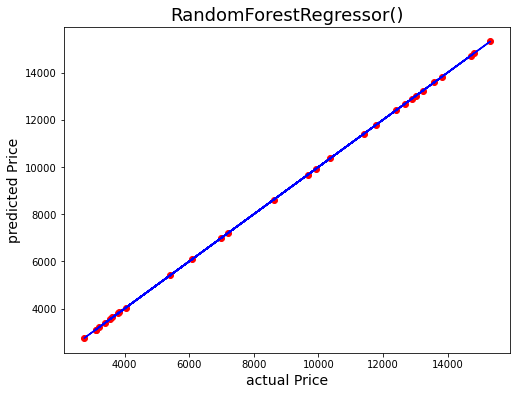

In [405]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual Price',fontsize=14)
plt.ylabel('predicted Price',fontsize=14)
plt.title('RandomForestRegressor()',fontsize=18)
plt.show()

Minimum difference in accuracy and cross validation score is for RandomForestRegressor so this our best moder



In [ ]:
from sklearn.model_selection import GridSearchCV # Hyper tunning model with GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf_decision=rf.predict(x_test)
rfs=r2_score(y_test,predrf_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfc*100)

Saving model

In [ ]:
import joblib
joblib.dump(rf,"Flight_ticket.csv.obj")

Uploading test data

In [ ]:
df2=pd.read_csv("Flight_ticket_test.csv")

In [ ]:
df2

In [ ]:
df2.columns

In [ ]:
df2.keys

In [ ]:
df2.info()

In [ ]:
df2.dtypes

In [ ]:
df2.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()

df2["Airline"]=LE.fit_transform(df2["Airline"])
df2["Date_of_Journey"]=LE.fit_transform(df2["Date_of_Journey"])
df2["Source"]=LE.fit_transform(df2["Source"])
df2["Destination"]=LE.fit_transform(df2["Destination"])
df2["Route"]=LE.fit_transform(df2["Route"])
df2["Dep_Time"]=LE.fit_transform(df2["Dep_Time"])
df2["Arrival_Time"]=LE.fit_transform(df2["Arrival_Time"])
df2["Duration"]=LE.fit_transform(df2["Duration"])
df2["Total_Stops"]=LE.fit_transform(df2["Total_Stops"])
df2["Additional_Info"]=LE.fit_transform(df2["Additional_Info"])

In [ ]:
df2.describe()

In [ ]:
dfcor=df.corr()
dfcor

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Plotting boxplots to check outliers
df2.iloc[:,0:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df2))
z


In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df2_new=df2[(z<3).all(axis=1)]
print(df2.shape)
print(df2_new.shape)

In [ ]:
loss_percent=(2671-2668)/2671*100
print(loss_percent)

In [ ]:
df2.skew() #checking skewness

In [ ]:
from sklearn.preprocessing import power_transform #Removing Skewness
df2_new=power_transform(df2)
df2_new=pd.DataFrame(df2_new,columns=df2.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler #Scalling dataset
sc=StandardScaler()
x=sc.fit_transform(df2)
x

importing train data

In [ ]:
p=joblib.load(open("Flight_ticket.csv.obj","rb"))

In [ ]:
p

In [ ]:
prediction=p.predict(df2)

In [ ]:
prediction